In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
!pip install lifelines
from lifelines import KaplanMeierFitter

### all packages sorter

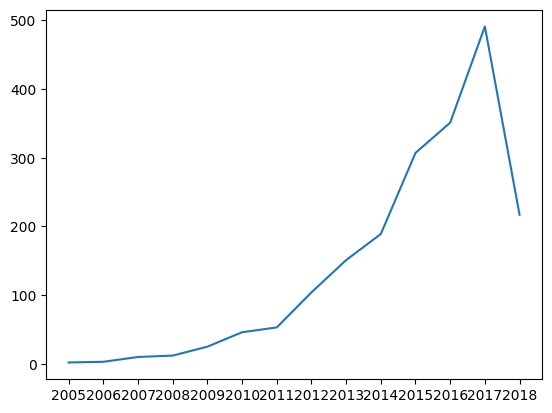

In [ ]:
pkgs_years = {}
pkg_name = None
with open('subset_data.csv') as f:
    plines = f.readlines()
    f.close()
i = 0
for pline in plines:
  package_data = pline.split(",")
  pkg_name = package_data[0]
  year = package_data[2][:4]
  if year not in pkgs_years:
    pkgs_years[year] = []
  if package_data[0] not in pkgs_years[year]:
    pkgs_years[year].append(package_data[0])
  i += 1

pkgs_per_year = []
years = sorted(list(pkgs_years.keys()))
for year in years:
  pkgs_per_year.append(len(pkgs_years[year]))
plt.plot(years, pkgs_per_year)

### results data sorter

In [ ]:
def yearly_vuln_plot(scan_data):
  # number of vulnerable packages
  vuln_packages_per_year = {}
  # number of vulnerabilities
  vulnerabilities_per_year = {}
  # number of vulnerabilities per severity
  severities_per_year = {}
  # fill packages with list of packages
  severities = ["NULL", "LOW", "MEDIUM", "HIGH", "CRITICAL"]

  for version in scan_data:
    pk = 0
    pkl = 1
    package_name = version['pkg_name']
    if version["published"]["date"] is not None and version['num_issues'] > 0:
      year = version["published"]["date"].split("-")[0]
      # add year if not created yet
      if year not in vuln_packages_per_year:
        vuln_packages_per_year[year] = []
        vulnerabilities_per_year[year] = 0
        severities_per_year[year] = {"NULL": 0, "LOW": 0, "MEDIUM": 0, "HIGH": 0, "CRITICAL": 0}
      if package_name not in vuln_packages_per_year[year]:
        vuln_packages_per_year[year].append(package_name)
        vulnerabilities_per_year[year] = vulnerabilities_per_year[year] + int(version['num_issues'])
        for sev in severities:
          severities_per_year[year][sev] = severities_per_year[year][sev] + int(version["issue_severity"][sev])

  package_num = [0]
  vuln_pack_num = []
  null, low, medium, high, critical = [], [], [], [], []
  print(years)
  for year in years:
    if year in vuln_packages_per_year:
      vuln_pack_num.append(len(vuln_packages_per_year[year]))
      null.append(severities_per_year[year]["NULL"])
      low.append(severities_per_year[year]["LOW"])
      medium.append(severities_per_year[year]["MEDIUM"])
      high.append(severities_per_year[year]["HIGH"])
      critical.append(severities_per_year[year]["CRITICAL"])
    else:
      vuln_pack_num.append(0)
      null.append(0)
      low.append(0)
      medium.append(0)
      high.append(0)
      critical.append(0)
  print(vuln_pack_num)
  return vuln_pack_num, null, low, medium, high, critical, vulnerabilities_per_year



### vulnerability scan results


In [ ]:
with open('bandit_results.json') as json_data:
    bandit_data = json.load(json_data)
    json_data.close()

bandit_vuln_pkg_num, bandit_null, bandit_low, bandit_medium, bandit_high, bandit_critical, bandit_vulns_yearly = yearly_vuln_plot(bandit_data)
bandit_vuln_pkg_num

['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
[0, 0, 3, 3, 8, 18, 25, 50, 73, 99, 158, 209, 253, 121]


[0, 0, 3, 3, 8, 18, 25, 50, 73, 99, 158, 209, 253, 121]

In [ ]:
with open('safety_results.json') as json_data:
    safety_data = json.load(json_data)
    json_data.close()
safety_vuln_pkg_num, safety_null, safety_low, safety_medium, safety_high, safety_critical, safety_vulns_yearly = yearly_vuln_plot(safety_data)


['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
[1, 0, 0, 0, 0, 3, 1, 3, 4, 2, 1, 2, 5, 5]


### Kaplan meier plot

In [ ]:
def vuln_time_plot(scan_data):
  # number of vulnerable packages
  vuln_packages = {}
  sev_vuln_pkgs = {}
  # number of vulnerabilities
  vuln_pkgs_start = {}
  vuln_pkgs_end = {}
  vuln_pkgs_status = {}
  # fill packages with list of packages
  severities = ["NULL", "LOW", "MEDIUM", "HIGH", "CRITICAL"]

  for package in pkgs:
    for version in package:
      package_name = version['pkg_name']
      if version["published"]["date"] is not None and version['num_issues'] > 0:
        date = pd.to_datetime(version["published"]["date"])
        # add year if not created yet

          vuln_packages_per_year[year] = []
          vulnerabilities_per_year[year] = 0
          severities_per_year[year] = {"NULL": 0, "LOW": 0, "MEDIUM": 0, "HIGH": 0, "CRITICAL": 0}
        if package_name not in vuln_packages_per_year[year]:
          vuln_packages_per_year[year].append(package_name)
          vulnerabilities_per_year[year] = vulnerabilities_per_year[year] + int(version['num_issues'])
          for sev in severities:
            severities_per_year[year][sev] = severities_per_year[year][sev] + int(version["issue_severity"][sev])

  package_num = [0]
  vuln_pack_num = []
  null, low, medium, high, critical = [], [], [], [], []
  print(years)
  for year in years:
    if year in vuln_packages_per_year:
      vuln_pack_num.append(len(vuln_packages_per_year[year]))
      null.append(severities_per_year[year]["NULL"])
      low.append(severities_per_year[year]["LOW"])
      medium.append(severities_per_year[year]["MEDIUM"])
      high.append(severities_per_year[year]["HIGH"])
      critical.append(severities_per_year[year]["CRITICAL"])
    else:
      vuln_pack_num.append(0)
      null.append(0)
      low.append(0)
      medium.append(0)
      high.append(0)
      critical.append(0)
  print(vuln_pack_num)
  return vuln_pack_num, null, low, medium, high, critical

##Plots

<Figure size 640x480 with 0 Axes>

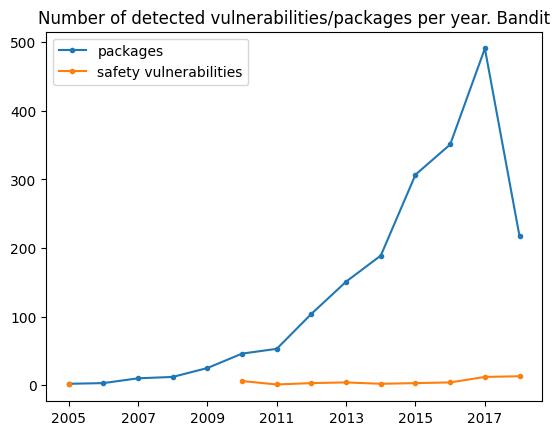

<Figure size 640x480 with 0 Axes>

In [ ]:
    df = pd.DataFrame({
    'packages': pkgs_per_year,
    #'bandit4mal vulnerable': bandit_vulns_yearly, # use vuln_pkg_num for number of vulnerable packages
    'safety vulnerabilities': safety_vulns_yearly
        }, index=years)
    lines = df.plot(style='.-')
    plt.title("Number of detected vulnerabilities/packages per year. Bandit")
    plt.legend()
    plt.figure()

Text(0.5, 1.0, 'Safety vulnerabilities per year by the severity levels: critical, high, medium, and low.')

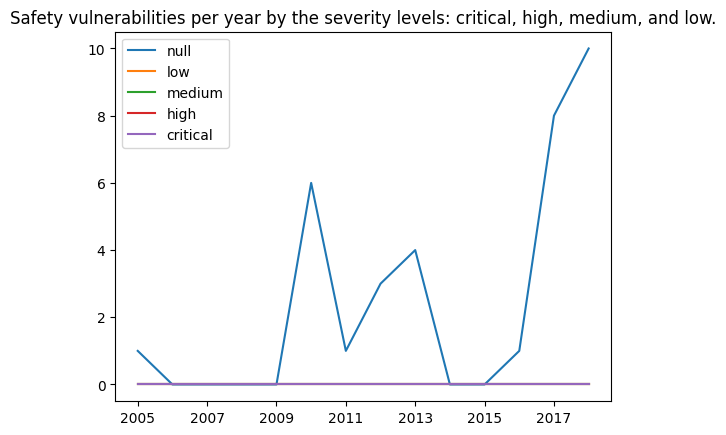

In [ ]:
    df = pd.DataFrame({
    #'bandit4mal vulnerable': bandit_vuln_pkg_num,
    'null': safety_null,
    "low": safety_low,
    "medium": safety_medium,
    "high": safety_high,
    "critical": safety_critical
        }, index=years)
    lines = df.plot.line()
    plt.title("Safety vulnerabilities per year by the severity levels: critical, high, medium, and low.")
